<a href="https://colab.research.google.com/github/DyatlovaA/cv-tf/blob/main/%D0%9F%D0%98%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Линейная регрессия

На этом практическом занятии Вы используете встроенную в sklearn модель LinearRegression для решения задач одномерной и множественной линейной регрессии.

## Задача 1. Одномерная линейная регрессия (для искусственного датасета)

В качестве датасета возьмем точки, лежащие на прямой и испортим их, добавив небольшой шум. Далее воспользуемся реализацией алгоритма линейной регрессии из пакета sklearn, найдем и построим прямую, проходящую через наши точки.

Сначала импортируем нужные пакеты.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Создадим искусственный датасет.

In [2]:
x = np.random.rand(100, 1)
y = 2 + 3 * x + 0.5*np.random.randn(100, 1)

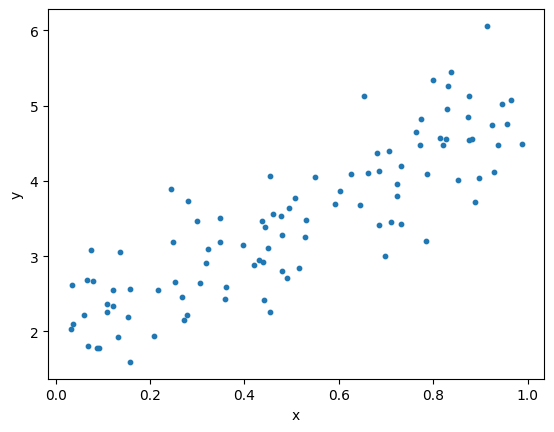

In [3]:
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Используем модель LinearRegression из пакета sklearn. Обучим и протестируем ее на наших данных.

In [5]:
regression_model = LinearRegression()
regression_model.fit(x, y) # fit-обучение
y_predicted = regression_model.predict(x) # predict-предсказать

Оценим точность модели.

In [6]:
rmse = mean_squared_error(y, y_predicted)
print('Root mean squared error: ', rmse)

Root mean squared error:  0.268461855519406


In [7]:
mae = mean_absolute_error(y, y_predicted)
print('Mean absolute error:', mae)

Mean absolute error: 0.40647330729511183


Найдем параметры линейной зависимости.

In [8]:
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)

Slope: [[2.98911918]]
Intercept: [1.95919574]


Построим точки и найденную прямую.

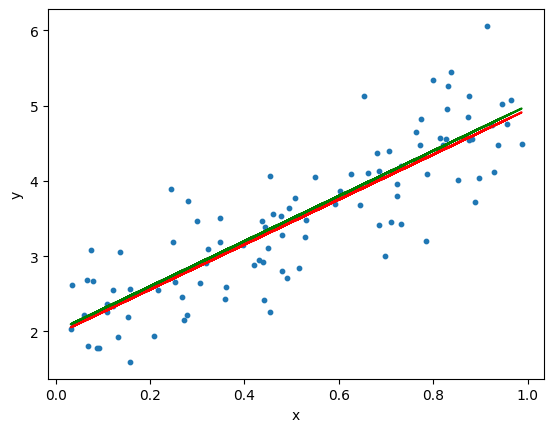

In [9]:
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x, y_predicted, color='r') # найденная зависимость
plt.plot(x, 2+3*x, color='g')  # истинная прямая
plt.show()

## Задача 2. Множественная линейная регрессия

Мы построим модель машинного обучения, предсказывающую среднюю стоимость дома в конкретном районе по таким показателям как население, средний доход, возраст, число комнат и т.д.

### Загрузим датасет с ценами на дома и посмотрим на него.

In [10]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)

Посмотрим на его описание.

In [11]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

Посмотрим также на фрагмент таблицы, представляющей наш датасет. Переменная MedHouseVal представляет собой цену на дом (в сотне тысяч долларов) и ее нам и нужно предсказывать, основываясь на остальных 8 признаках. Эти признаки содержат информацию о доходе жителей, о доме (количество комнат, количество спален, возраст дома), расположение района (широта, долгота).

In [12]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Мы видим, что нет пропущенных значений в нашей таблице. Все столбцы содержат по 20640 значений типа float.

In [13]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Построим гистограммы и посмотрим на распределение каждого признака.

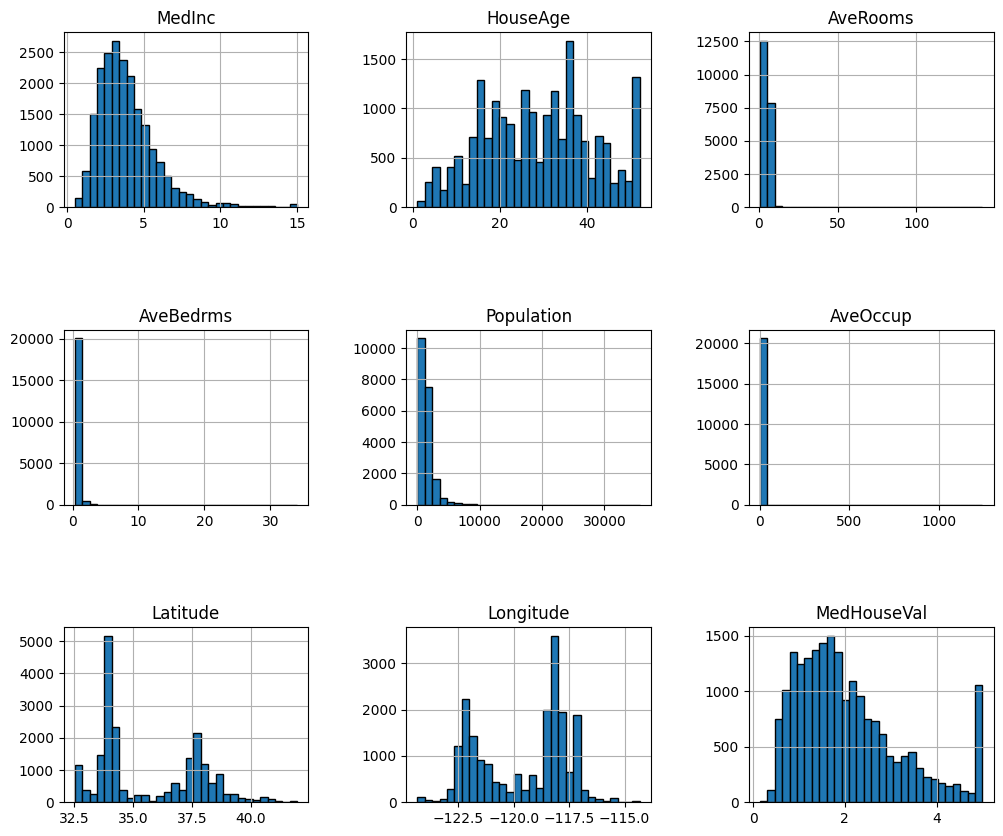

In [14]:
california_housing.frame.hist(bins=30, figsize=(12, 10), edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

Мы видим:

Признаки имеют сильно отличающиеся диапазоны изменений. На это нужно обращать внимание в задачах машинного обучения. Для большинства методов важно, чтобы признаки были сопоставимы по масштабу.

Средний доход представляет собой распределение с длинным хвостом. Это означает, что зарплата людей распределяется более-менее нормально, но есть люди, получающие высокую зарплату. Что касается среднего возраста домов, то здесь распределение более или менее равномерное.

Распределение MedHouseVal также имеет длинный хвост. Кроме того, у нас есть пороговый эффект для дорогих домов: всем домам с ценой выше 5 присваивается значение 5.

Признаки AveRooms, AveBedrms, Population, AveOccup похоже принимают какие-то аномально большие значения. Может быть, их можно считать выбросами. Посмотрим на статистику по этим признакам.

In [15]:
features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
california_housing.frame[features_of_interest].describe()

,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


Большая разница между **max** и **75%** значениями подтверждает наше предположение о паре выбросов.

Рассмотрим также признаки Latitude, Longitude, которые несут информацию о расположении домов. Построим график, где оси X и Y есть широта и долгота, а размер и цвет точки связан со стоимостью дома в районе.

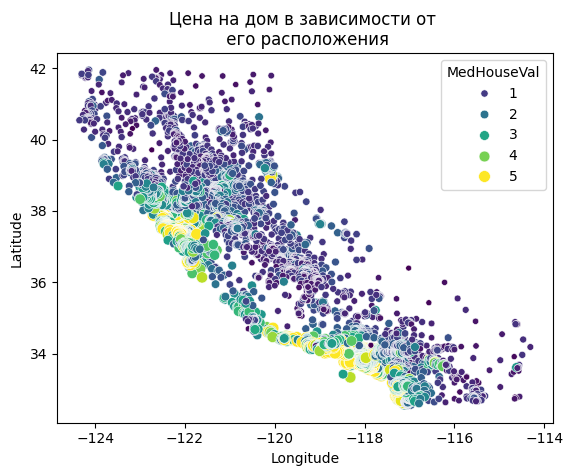

In [16]:
import seaborn as sns

sns.scatterplot(data=california_housing.frame, x="Longitude",
                 y="Latitude", size = "MedHouseVal",
               hue="MedHouseVal", palette="viridis")

plt.legend(title="MedHouseVal", loc="upper right")

plt.title("Цена на дом в зависимости от \n его расположения")
plt.show()

Дейсвительно, рисунок напоминает форму Калифорнии. Более дорогие дома находятся на побережье.


![California](https://i.ibb.co/8XwbS93/california.jpg)


### Найдем корреляцию между признаками

Используем функцию corr() и упорядочим найденные коэффициенты корреляции по убыванию.

In [17]:
correlations = california_housing.frame.corr()

In [18]:
correlations

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [19]:
correlations = california_housing.frame.corr()
correlations['MedHouseVal'].sort_values(ascending=False)

,MedHouseVal
MedHouseVal,1.000000
MedInc,0.688075
AveRooms,0.151948
HouseAge,0.105623
AveOccup,-0.023737
Population,-0.024650
Longitude,-0.045967
AveBedrms,-0.046701
Latitude,-0.144160


Видим, что больше всего цена на дом коррелирует со средним доходом хозяина. Этот вполне ожидаемый результат подтверждает и рисунок ниже.

<Axes: xlabel='MedInc', ylabel='MedHouseVal'>

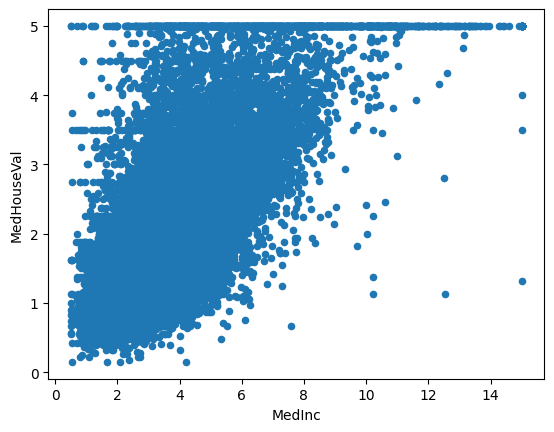

In [20]:
california_housing.frame.plot(kind="scatter", x='MedInc', y='MedHouseVal')

### Разделим датасет на тестовую и обучающую выборку, обучим и протестируем модель

Используем функцию train-test split, чтобы разделить данные на обучающую и тестовую выборки в соотношении 80%+20%.

In [21]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(california_housing.frame, test_size=0.15, random_state=42)
print(len(train_set), "Train Instances +", len(test_set), "Test Instances")

17544 Train Instances + 3096 Test Instances


Создадим переменные X_train и X_test, содержащие значения 8 признаков. Значения цены на дом запишем в переменные Y_train, Y_test, соответственно.

In [22]:
X_train=train_set[['MedInc','HouseAge','Longitude','Latitude']]
Y_train=train_set['MedHouseVal']
X_test=test_set[['MedInc','HouseAge','Longitude','Latitude']]
Y_test=test_set['MedHouseVal']

In [23]:
X_train

,MedInc,HouseAge,Longitude,Latitude
4602,1.2012,12.0,-118.27,34.05
6978,3.8275,32.0,-118.03,33.97
16415,3.1719,42.0,-121.26,37.88
2549,1.9688,43.0,-124.17,40.79
11025,4.1339,26.0,-117.82,33.79
...,...,...,...,...
11284,6.3700,35.0,-117.96,33.78
11964,3.0500,33.0,-117.43,34.02
5390,2.9344,36.0,-118.38,34.03
860,5.7192,15.0,-121.96,37.58


In [24]:
X_train=train_set.drop(columns=['MedHouseVal'])
Y_train=train_set['MedHouseVal']
X_test=test_set.drop(columns=['MedHouseVal'])
Y_test=test_set['MedHouseVal']

Обучим модель линейной регрессии на тренировочном датасете.

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

Предскажем с помощью обученной модели цены на дома из тестового набора данных.

In [26]:
Y_predicted = lin_reg.predict(X_test)

Оценим модель.

In [27]:
rmse = mean_squared_error(Y_test, Y_predicted)
print('Root mean squared error: ', rmse)
mae = mean_absolute_error(Y_test, Y_predicted)
print('Mean absolute error:', mae)

Root mean squared error:  0.5367808835096931
Mean absolute error: 0.5353782997895156


In [28]:
rmse = mean_squared_error(Y_test, Y_predicted)
print('Root mean squared error: ', rmse)
mae = mean_absolute_error(Y_test, Y_predicted)
print('Mean absolute error:', mae)

Root mean squared error:  0.5367808835096931
Mean absolute error: 0.5353782997895156


Посмотрим истинные значения цен в тестовом наборе и предсказанные моделью.

In [29]:
np.array(Y_test)

array([0.477  , 0.458  , 5.00001, ..., 2.139  , 1.55   , 1.33   ])

In [30]:
Y_predicted

array([0.72964932, 1.75472575, 2.67342351, ..., 2.38480041, 2.41179119,
       1.80155893])

## Задание (по желанию)

Как показывает предварительный анализ данных, наибольшее влияние на цену дома имеют признаки MedInc, Longitude, Latitude. Постройте модель множественной линейной регрессии, в которой только эти три признака являются входными.  Оцените точность модели. Стоит ли использовать все 8 признаков или выбранные три признака уже обеспечивают такую же хорошую работу модели?


📊 ОЦЕНКА ТОЧНОСТИ МОДЕЛЕЙ
Модель на 3 признаках (MedInc, Longitude, Latitude):
  MSE: 0.5608
  R²:  0.5721

Модель на 8 признаках:
  MSE: 0.5559
  R²:  0.5758

🔍 Вывод:
✅ Три признака дают практически такую же точность, как и все 8.
   Рекомендуется использовать упрощённую модель — она проще и интерпретируемее.


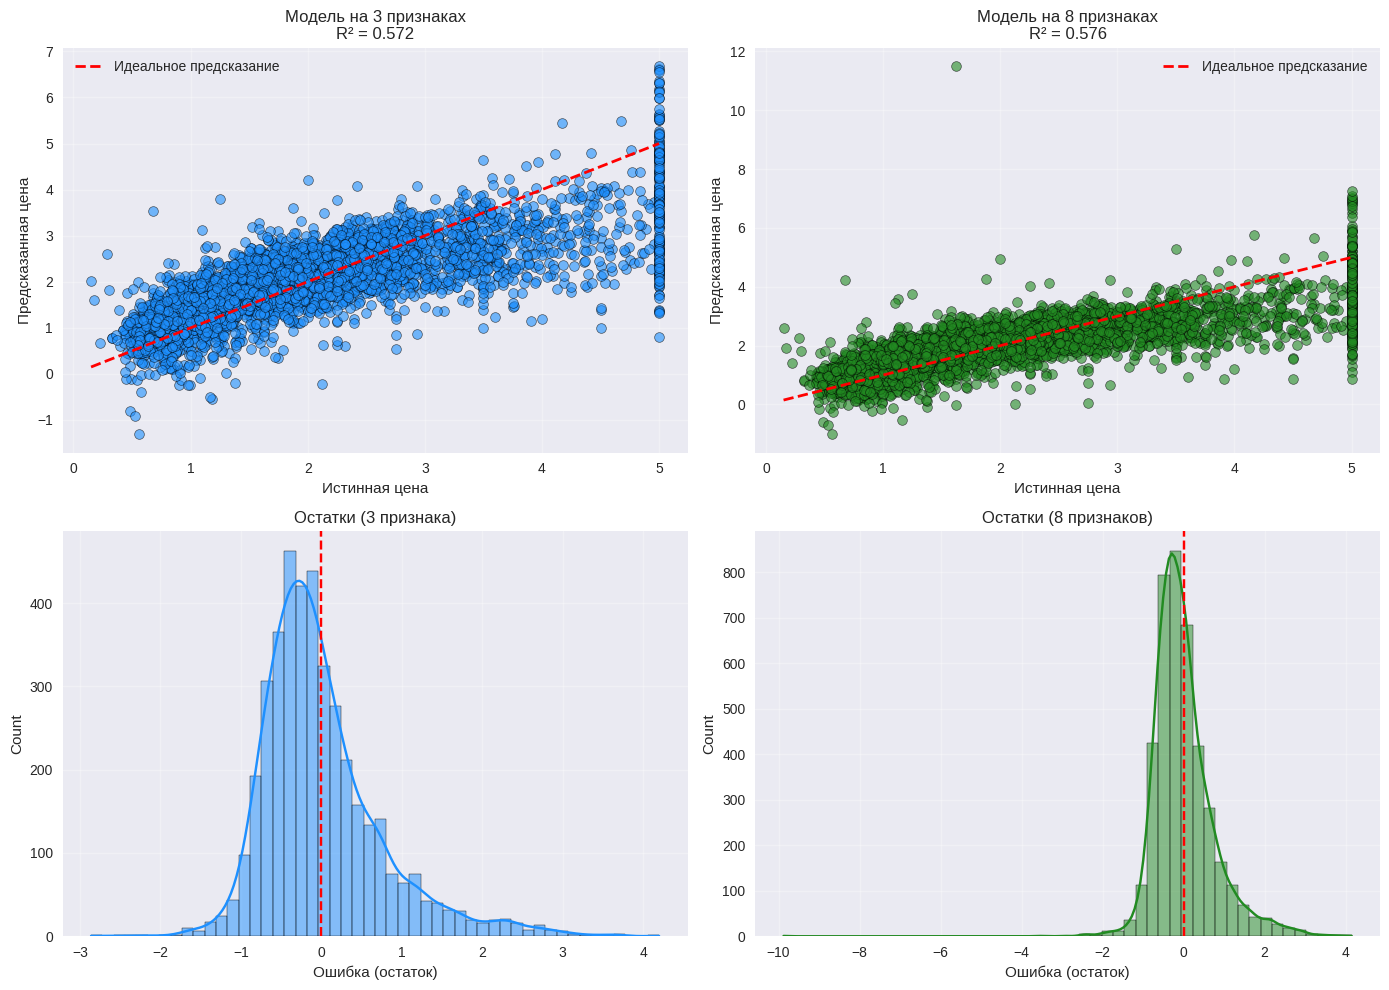

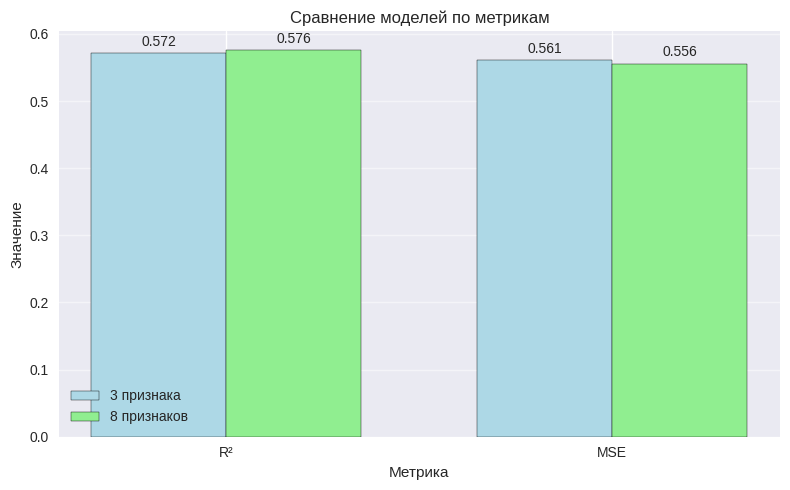

In [36]:
# Импорты
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Выбор трёх наиболее значимых признаков
X_3 = X[['MedInc', 'Longitude', 'Latitude']]

# Разделение данных
X_train_3, X_test_3, y_train, y_test = train_test_split(X_3, y, test_size=0.2, random_state=42)
X_train_all, X_test_all, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)

# Модель на 3 признаках
model_3 = LinearRegression()
model_3.fit(X_train_3, y_train)
y_pred_3 = model_3.predict(X_test_3)

# Модель на всех 8 признаках
model_all = LinearRegression()
model_all.fit(X_train_all, y_train)
y_pred_all = model_all.predict(X_test_all)

# Оценка точности
mse_3 = mean_squared_error(y_test, y_pred_3)
r2_3 = r2_score(y_test, y_pred_3)
mse_all = mean_squared_error(y_test, y_pred_all)
r2_all = r2_score(y_test, y_pred_all)

print("="*60)
print("📊 ОЦЕНКА ТОЧНОСТИ МОДЕЛЕЙ")
print("="*60)
print(f"Модель на 3 признаках (MedInc, Longitude, Latitude):")
print(f"  MSE: {mse_3:.4f}")
print(f"  R²:  {r2_3:.4f}")
print()
print(f"Модель на 8 признаках:")
print(f"  MSE: {mse_all:.4f}")
print(f"  R²:  {r2_all:.4f}")
print()
print("🔍 Вывод:")
if r2_all - r2_3 < 0.01:
    print("✅ Три признака дают практически такую же точность, как и все 8.")
    print("   Рекомендуется использовать упрощённую модель — она проще и интерпретируемее.")
else:
    print("⚠️  Разница в R² значительна — возможно, стоит использовать все признаки.")

# ВИЗУАЛИЗАЦИЯ
plt.style.use('seaborn-v0_8')  # или 'seaborn' для старых версий

# 1. Scatter plot: истинные vs предсказанные значения
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Scatter plot — 3 признака
axes[0, 0].scatter(y_test, y_pred_3, alpha=0.6, color='dodgerblue', edgecolor='k', linewidth=0.5)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Идеальное предсказание")
axes[0, 0].set_xlabel("Истинная цена")
axes[0, 0].set_ylabel("Предсказанная цена")
axes[0, 0].set_title(f"Модель на 3 признаках\nR² = {r2_3:.3f}")
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Scatter plot — 8 признаков
axes[0, 1].scatter(y_test, y_pred_all, alpha=0.6, color='forestgreen', edgecolor='k', linewidth=0.5)
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Идеальное предсказание")
axes[0, 1].set_xlabel("Истинная цена")
axes[0, 1].set_ylabel("Предсказанная цена")
axes[0, 1].set_title(f"Модель на 8 признаках\nR² = {r2_all:.3f}")
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 2. Гистограммы остатков
residuals_3 = y_test - y_pred_3
residuals_all = y_test - y_pred_all

sns.histplot(residuals_3, bins=50, kde=True, ax=axes[1, 0], color='dodgerblue')
axes[1, 0].set_title("Остатки (3 признака)")
axes[1, 0].set_xlabel("Ошибка (остаток)")
axes[1, 0].axvline(0, color='red', linestyle='--')
axes[1, 0].grid(True, alpha=0.3)

sns.histplot(residuals_all, bins=50, kde=True, ax=axes[1, 1], color='forestgreen')
axes[1, 1].set_title("Остатки (8 признаков)")
axes[1, 1].set_xlabel("Ошибка (остаток)")
axes[1, 1].axvline(0, color='red', linestyle='--')
axes[1, 1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Сравнение метрик — столбчатая диаграмма
fig, ax = plt.subplots(figsize=(8, 5))

metrics = ['R²', 'MSE']
model_3_vals = [r2_3, mse_3]
model_all_vals = [r2_all, mse_all]

x = range(len(metrics))
width = 0.35

bars1 = ax.bar([i - width/2 for i in x], model_3_vals, width, label='3 признака', color='lightblue', edgecolor='black')
bars2 = ax.bar([i + width/2 for i in x], model_all_vals, width, label='8 признаков', color='lightgreen', edgecolor='black')

ax.set_xlabel('Метрика')
ax.set_ylabel('Значение')
ax.set_title('Сравнение моделей по метрикам')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(axis='y', alpha=0.5)

# Подписи значений
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## Отбор признаков *

Можно воспользоваться реализованным в sklearn статистическим методом отбора лучших признаков. Например, далее мы находим три наиболее информативных признака в нашей задаче. Это оказываются именно те признаки, которые мы и подозревали.

In [37]:
import pandas as pd
from sklearn.feature_selection import GenericUnivariateSelect, mutual_info_regression

selector=GenericUnivariateSelect(score_func=mutual_info_regression, mode='k_best', param=3)
selector.fit(X_train,Y_train)
pd.DataFrame(data={'score':selector.scores_,
                   'support':selector.get_support()},
             index=X_train.columns).sort_values(by='score', ascending=False)

,score,support
Longitude,0.392054,True
MedInc,0.387536,True
Latitude,0.366479,True
AveRooms,0.100744,False
AveOccup,0.073210,False
HouseAge,0.032990,False
Population,0.024797,False
AveBedrms,0.021965,False


In [38]:
import pandas as pd
data = [[-1, 200], [-0.5, 155], [0, 130], [1, 175]]
d1=pd.DataFrame(data, columns=['Feature 1', 'Feature 2'])
d1

,Feature 1,Feature 2
0,-1.0,200
1,-0.5,155
2,0.0,130
3,1.0,175


In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(d1)

MinMaxScaler()

In [40]:
pd.DataFrame(scaler.transform(d1), columns=['Feature 1', 'Feature 2'])

,Feature 1,Feature 2
0,0.00,1.000000
1,0.25,0.357143
2,0.50,0.000000
3,1.00,0.642857


In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(d1)

StandardScaler()

In [42]:
pd.DataFrame(scaler.transform(d1), columns=['Feature 1', 'Feature 2'])

,Feature 1,Feature 2
0,-1.183216,1.359800
1,-0.507093,-0.388514
2,0.169031,-1.359800
3,1.521278,0.388514
